In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
clients_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')
df_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-ishutenko/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [64]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [65]:
clients_df.shape

(122078, 4)

In [66]:
df_data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [67]:
df_data.groupby('ad_id') \
       .agg({'event':'value_counts'}) \
       .rename(columns = {'event':'counts'}) \
       .reset_index() \
       .pivot(index = 'ad_id', columns = 'event', values = 'counts') \
       .fillna(0) \
       .mean() \
       .round()

event
click    113.0
view     923.0
dtype: float64

In [68]:
view_log = np.log(df_data.groupby('ad_id') \
       .agg({'event':'value_counts'}) \
       .rename(columns = {'event':'counts'}) \
       .reset_index() \
       .pivot(index = 'ad_id', columns = 'event', values = 'counts') \
       #.fillna(0) \
       .view)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


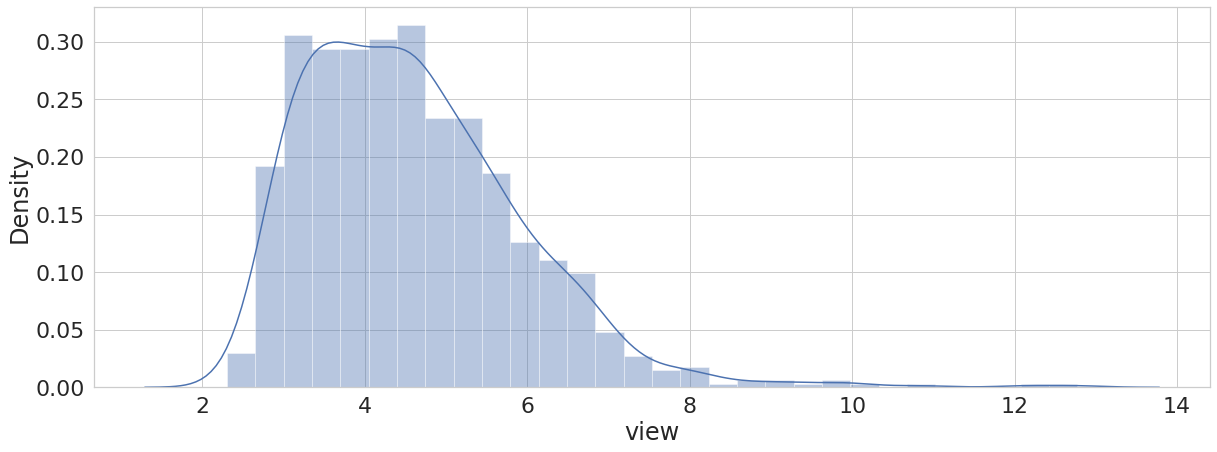

In [69]:
sns.distplot(view_log)

In [70]:
rolling_mean_count = df_data.query('event == "view"') \
       .groupby(['date','ad_id'], as_index=False) \
       .agg({'has_video':'count'}) \
       .rename(columns = {'has_video':'count_id'}) \
       .groupby('date') \
       .agg({'count_id':'mean'}) \
       .rolling(2).mean().round()
mean_count = df_data.query('event == "view"') \
       .groupby(['date','ad_id'], as_index=False) \
       .agg({'has_video':'count'}) \
       .rename(columns = {'has_video':'count_id'}) \
       .groupby('date') \
       .agg({'count_id':'mean'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


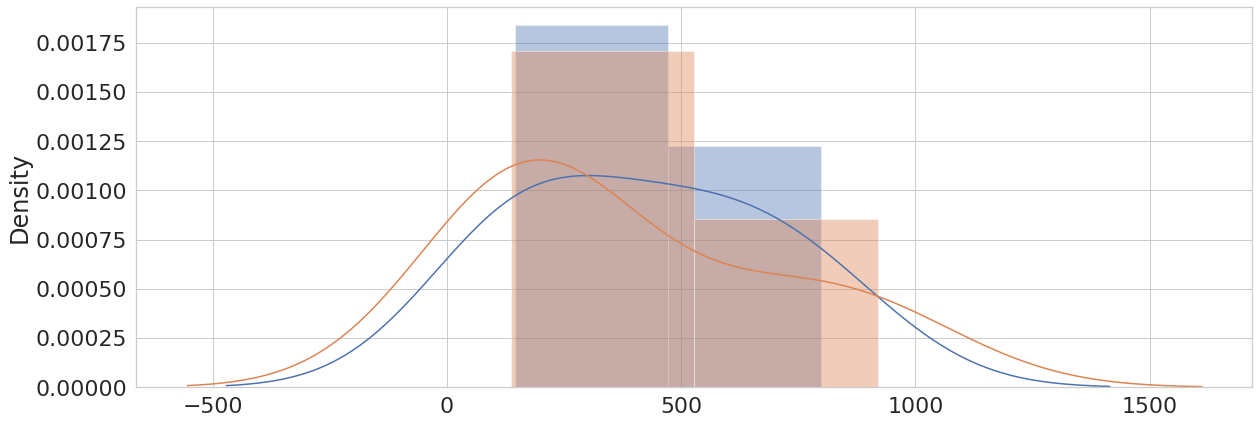

In [71]:
sns.distplot(rolling_mean_count)
sns.distplot(mean_count)

In [72]:
abs(rolling_mean_count-mean_count)

,count_id
date,
2019-04-01,NaN
2019-04-02,8.213018
2019-04-03,12.952778
2019-04-04,255.901720
2019-04-05,121.109677
2019-04-06,320.877273


In [73]:
df_all = df_data.merge(clients_df, on='client_union_id',how='outer')

In [74]:
df_all

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121235,NaN,NaN,NaN,NaN,NaN,122073,NaN,NaN,NaN,NaN,NaN,2020-05-07,-130876640,2018-12-13
1121236,NaN,NaN,NaN,NaN,NaN,122074,NaN,NaN,NaN,NaN,NaN,2020-05-07,-130470790,2018-12-21
1121237,NaN,NaN,NaN,NaN,NaN,122075,NaN,NaN,NaN,NaN,NaN,2020-05-07,-130911261,2018-11-09
1121238,NaN,NaN,NaN,NaN,NaN,122076,NaN,NaN,NaN,NaN,NaN,2020-05-07,-130494912,2018-10-27


In [57]:
df_all.date_x = pd.to_datetime(df_all.date_x)
df_all.time = pd.to_datetime(df_all.time)
df_all.date_y = pd.to_datetime(df_all.date_y)
df_all.create_date = pd.to_datetime(df_all.create_date)

In [58]:
df_all.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061.0,34734,45061.0,CPM,200.6,0.0,1955269.0,2020-05-07,-130129582,2018-12-04


In [59]:
df_all['time_delta'] = df_all.date_x - df_all.create_date

In [60]:
df_all.groupby('client_union_id', as_index=False).agg({'time_delta':'min'}).mean()

client_union_id                        61039.5
time_delta         124 days 09:04:43.532219570
dtype: object

In [61]:
year = pd.Timedelta(365, unit='day')

In [62]:
df_all.query('time_delta < @year').shape[0]

1000000